# Introduction to Importing Data in Python

The 14th course in the career track **Data Scientist with Python**.

In this course, you'll learn the many ways to import data into Python: from flat files such as .txt and .csv; from files native to other software such as Excel spreadsheets, Stata, SAS, and MATLAB files; and from relational databases such as SQLite and PostgreSQL.

## 1. Flat files

Flat files are text files containing records. That is table data.
- record: row of fields (attributes)
- column: feature (attribute)
- file extension: .csv (comma separated values), .txt
- delimiters: commas, tabs

### 1.1 Read text files

In [1]:
filepath = "data/moby_dick.txt"

#### Read entire file

In [2]:
with open(filepath, "r") as fp:
    data = fp.read()
print(data)

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

#### Read file line by line

In [3]:
nb_lines = 4  # read the first 4 lines
with open(filepath, "r") as fp:
    for i in range(nb_lines):
        line = fp.readline()
        print(line)

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having

little or no money in my purse, and nothing particular to interest me on



### 1.2 Read flat files

#### Data files

In [4]:
digits_file = "data/digits.csv"
digits_header_file = "data/digits_header.txt"

`digits.csv` is a part of [MNIST dataset](http://yann.lecun.com/exdb/mnist/) in CSV format. It contains 100 rows. Each row consists of 785 values:
- the first value is the label (a number from 0 to 9)
- the remaining 784 values are the pixel values (a number fro 0 to 255) of an image of size 28x28.

More information about the MNIST dataset provided in a CSV format is at [kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv).

`digits_header.txt` is similar to `digits.csv` except that:
- it has headers at the first line.
- the delimiter is a tab.

In [5]:
sea_slug_file = "data/seaslug.txt"

`seaslug.txt` consists of percentage of a sea slug larvae that had metamorphosed in a given time period.
- it has a text header consisting of strings
- the remaing rows consisting numbers
- it is tab delimited

More information about seaslug at [Sea Slug Data](http://www.stat.ucla.edu/~rgould/datasets/aboutseaslugs.html)

In [6]:
titanic_file = "data/titanic.csv"

`titanic.csv` is a part of the dataset at [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data) at kaggle.

#### 1.2.1 Using NumPy

- all columns have the same data type: use the method `loadtxt()`.
- columns have different data types: use one of methods: `genfromtxt()`, `recfromcsv()`, or `recfromtxt()`.

In [7]:
import numpy as np

##### Using the method `loadtxt()`

This method reads data in a file then returns a numpy array. It **requires all elements having the same data type**.

By default, the data type of the output array is `float`. We can change it by giving value to the parameter `dtype` of the method.

###### Data doesn't have headers

In [8]:
data = np.loadtxt(digits_file, delimiter=",")

In [9]:
print(data[:5,:])
print(data.shape)
print(data.dtype)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 785)
float64


In [10]:
import matplotlib.pyplot as plt

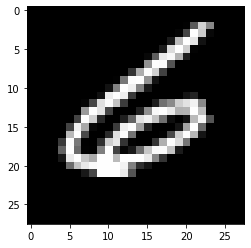

label: 6


In [11]:
# cast type of entire elements to int
data = data.astype("int")

# show an image with its label
label, im_flat = data[21,0], data[21,1:]
im = np.reshape(im_flat, (28, 28))
plt.imshow(im, cmap="gray")
plt.show()
print("label: %s" % label)

###### Data has a row of headers and we skip it

In [12]:
data = np.loadtxt(digits_header_file, delimiter="\t", skiprows=1)

Parameters:
- `delimiter`: delimiter in the reading file.
- `skiprows`: a number specifies **how many rows to skip**.

In [13]:
print(data[:5,:])
print(data.shape)
print(data.dtype)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 785)
float64


Another useful parameter of this method is `usecols`. It receives a list of the **indices of columns to keep**.

In [14]:
data = np.loadtxt(digits_file, delimiter=",", usecols=[0, 2])

In [15]:
print(data[:5,:])
print(data.shape)
print(data.dtype)

[[1. 0.]
 [0. 0.]
 [1. 0.]
 [4. 0.]
 [0. 0.]]
(100, 2)
float64


###### Data has a row of headers and we keep it

In [16]:
data_header = np.loadtxt(sea_slug_file, dtype='str', delimiter="\t")

In [17]:
print(data_header.shape)
print(data_header[:5,:])

(48, 2)
[['Time' 'Percent']
 ['99' '0.067']
 ['99' '0.133']
 ['99' '0.067']
 ['99' '0']]


In [18]:
header, data = data_header[0,:], data_header[1:,:].astype("float")

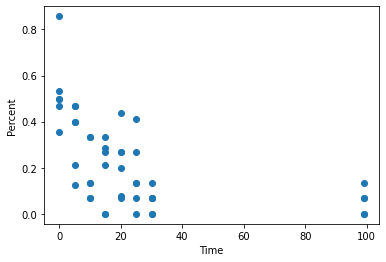

In [19]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel(header[0])
plt.ylabel(header[1])
plt.show()

##### Using the method `genfromtxt()`

This method can read flat files in which **columns have different data types** by indicating the value of the parameter `dtype` is `None`.

The resulting returned is a structured array object where each element of the array is a row of the flat file imported.

In the data returned, we can:
- access row by the index, for example, `data[2]`
- access column by the column name, for example, `data["Pclass"]`
- access an element by row index & column name/column index, for example, `data[2]["Pclass"]`, `data[2][2]`

In [20]:
data = np.genfromtxt(titanic_file, delimiter=",", names=True, dtype=None, encoding=None)

Parameters:
- `names`: True, specifying the file has headers
- `dtype`: None, data types will be determined by the contents of each column individually
- `encoding`: None, use the system default encoding to decode the file.

In [21]:
headers = list(data.dtype.fields.keys())
print(headers)

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [22]:
print(data.shape)
print(data[:5])
print(data["Pclass"])
print(data[2]["Pclass"])

(891,)
[(1, 0, 3, 'male', 22., 1, 0, 'A/5 21171',  7.25  , '', 'S')
 (2, 1, 1, 'female', 38., 1, 0, 'PC 17599', 71.2833, 'C85', 'C')
 (3, 1, 3, 'female', 26., 0, 0, 'STON/O2. 3101282',  7.925 , '', 'S')
 (4, 1, 1, 'female', 35., 1, 0, '113803', 53.1   , 'C123', 'S')
 (5, 0, 3, 'male', 35., 0, 0, '373450',  8.05  , '', 'S')]
[3 1 3 1 3 3 1 3 3 2 3 1 3 3 3 2 3 2 3 3 2 2 3 1 3 3 3 1 3 3 1 1 3 2 1 1 3
 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 1 2 1 1 2 3 2 3 3 1 1 3 1 3 2 3 3 3 2 3 2 3
 3 3 3 3 2 3 3 3 3 1 2 3 3 3 1 3 3 3 1 3 3 3 1 1 2 2 3 3 1 3 3 3 3 3 3 3 1
 3 3 3 3 3 3 2 1 3 2 3 2 2 1 3 3 3 3 3 3 3 3 2 2 2 1 1 3 1 3 3 3 3 2 2 3 3
 2 2 2 1 3 3 3 1 3 3 3 3 3 2 3 3 3 3 1 3 1 3 1 3 3 3 1 3 3 1 2 3 3 2 3 2 3
 1 3 1 3 3 2 2 3 2 1 1 3 3 3 2 3 3 3 3 3 3 3 3 3 1 3 2 3 2 3 1 3 2 1 2 3 2
 3 3 1 3 2 3 2 3 1 3 2 3 2 3 2 2 2 2 3 3 2 3 3 1 3 2 1 2 3 3 1 3 3 3 1 1 1
 2 3 3 1 1 3 2 3 3 1 1 1 3 2 1 3 1 3 2 3 3 3 3 3 3 1 3 3 3 2 3 1 1 2 3 3 1
 3 1 1 1 3 3 3 2 3 1 1 1 2 1 1 1 2 3 2 3 2 2 1 1 3 3 2 2 3 1 3 2 3 1 3 1 1

##### Using the method `recfromcsv()`

This method is similar to the method `genfromtxt()` except that:
- the `delimiter` is set to comma `,` by default.
- the `dtype` is set to `None` by default.
- the `names` is set to `True` by default.
- headers are in lower case.

In [23]:
data = np.recfromcsv(titanic_file, encoding=None)

In [24]:
headers = list(data.dtype.fields.keys())
print(headers)

['passengerid', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


In [25]:
print(data.shape)
print(data[:5])
print(data["pclass"])
print(data[2]["pclass"])

(891,)
[(1, 0, 3, 'male', 22., 1, 0, 'A/5 21171',  7.25  , '', 'S')
 (2, 1, 1, 'female', 38., 1, 0, 'PC 17599', 71.2833, 'C85', 'C')
 (3, 1, 3, 'female', 26., 0, 0, 'STON/O2. 3101282',  7.925 , '', 'S')
 (4, 1, 1, 'female', 35., 1, 0, '113803', 53.1   , 'C123', 'S')
 (5, 0, 3, 'male', 35., 0, 0, '373450',  8.05  , '', 'S')]
[3 1 3 1 3 3 1 3 3 2 3 1 3 3 3 2 3 2 3 3 2 2 3 1 3 3 3 1 3 3 1 1 3 2 1 1 3
 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 1 2 1 1 2 3 2 3 3 1 1 3 1 3 2 3 3 3 2 3 2 3
 3 3 3 3 2 3 3 3 3 1 2 3 3 3 1 3 3 3 1 3 3 3 1 1 2 2 3 3 1 3 3 3 3 3 3 3 1
 3 3 3 3 3 3 2 1 3 2 3 2 2 1 3 3 3 3 3 3 3 3 2 2 2 1 1 3 1 3 3 3 3 2 2 3 3
 2 2 2 1 3 3 3 1 3 3 3 3 3 2 3 3 3 3 1 3 1 3 1 3 3 3 1 3 3 1 2 3 3 2 3 2 3
 1 3 1 3 3 2 2 3 2 1 1 3 3 3 2 3 3 3 3 3 3 3 3 3 1 3 2 3 2 3 1 3 2 1 2 3 2
 3 3 1 3 2 3 2 3 1 3 2 3 2 3 2 2 2 2 3 3 2 3 3 1 3 2 1 2 3 3 1 3 3 3 1 1 1
 2 3 3 1 1 3 2 3 3 1 1 1 3 2 1 3 1 3 2 3 3 3 3 3 3 1 3 3 3 2 3 1 1 2 3 3 1
 3 1 1 1 3 3 3 2 3 1 1 1 2 1 1 1 2 3 2 3 2 2 1 1 3 3 2 2 3 1 3 2 3 1 3 1 1

#### 1.2.2 Using Pandas

The method `read_csv()` is used to read flat files. By default, it considers:
- the file has headers.
- the delimiter is comma.
- data types of columns will be determined by the contents individually.

In [26]:
import pandas as pd

##### Normal CSV file

In [27]:
df = pd.read_csv(titanic_file)

In [28]:
# explorer data
display(df.head())
print(df.dtypes)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [29]:
# get headers
headers = list(df.columns)
print(headers)

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [30]:
# convert to numpy array
data = df.values
type(data)

numpy.ndarray

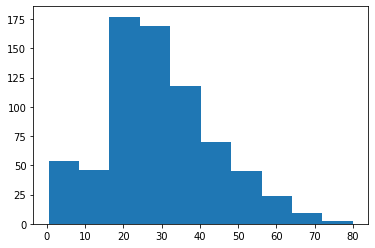

In [31]:
plt.hist(df['Age'])
plt.show()

##### Non-header file

In [32]:
df = pd.read_csv(digits_file, header=None)

In [33]:
display(df.head())
print(df.shape)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(100, 785)


##### Tab delimiter file

In [34]:
df = pd.read_csv(sea_slug_file, sep="\t")

In [35]:
display(df.head())
print(df.shape)

,Time,Percent
0,99,0.067
1,99,0.133
2,99,0.067
3,99,0.000
4,99,0.000


(47, 2)


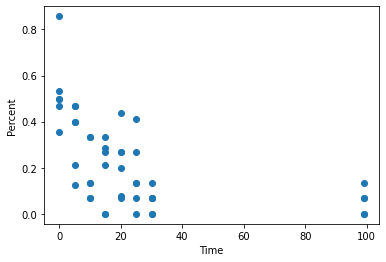

In [36]:
plt.scatter(df.Time, df.Percent)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()